In [32]:
from glob import glob
import numpy as np
import SimpleITK as sitk
from loguru import logger
from tqdm import tqdm

raw_segment_labels = {
    "background": 0,
    "Lower Jawbone": 1,
    "Upper Jawbone": 2,
    "Left Inferior Alveolar Canal": 3,
    "Right Inferior Alveolar Canal": 4,
    "Left Maxillary Sinus": 5,
    "Right Maxillary Sinus": 6,
    "Pharynx": 7,
    "Bridge": 8,
    "Crown": 9,
    "Implant": 10,
    "Upper Right Central Incisor": 11,
    "Upper Right Lateral Incisor": 12,
    "Upper Right Canine": 13,
    "Upper Right First Premolar": 14,
    "Upper Right Second Premolar": 15,
    "Upper Right First Molar": 16,
    "Upper Right Second Molar": 17,
    "Upper Right Third Molar (Wisdom Tooth)": 18,
    "Upper Left Central Incisor": 21,
    "Upper Left Lateral Incisor": 22,
    "Upper Left Canine": 23,
    "Upper Left First Premolar": 24,
    "Upper Left Second Premolar": 25,
    "Upper Left First Molar": 26,
    "Upper Left Second Molar": 27,
    "Upper Left Third Molar (Wisdom Tooth)": 28,
    "Lower Left Central Incisor": 31,
    "Lower Left Lateral Incisor": 32,
    "Lower Left Canine": 33,
    "Lower Left First Premolar": 34,
    "Lower Left Second Premolar": 35,
    "Lower Left First Molar": 36,
    "Lower Left Second Molar": 37,
    "Lower Left Third Molar (Wisdom Tooth)": 38,
    "NA": 40,
    "Lower Right Central Incisor": 41,
    "Lower Right Lateral Incisor": 42,
    "Lower Right Canine": 43,
    "Lower Right First Premolar": 44,
    "Lower Right Second Premolar": 45,
    "Lower Right First Molar": 46,
    "Lower Right Second Molar": 47,
    "Lower Right Third Molar (Wisdom Tooth)": 48
}

target_labels = {
    "background": 0,
    "Lower Jawbone": 1,
    "Upper Jawbone": 2,
    "Left Inferior Alveolar Canal": 3,
    "Right Inferior Alveolar Canal": 4,
    "Left Maxillary Sinus": 5,
    "Right Maxillary Sinus": 6,
    "Pharynx": 7,
    "Bridge": 8,
    "Crown": 9,
    "Implant": 10,
    "Upper Right Central Incisor": 11,
    "Upper Right Lateral Incisor": 12,
    "Upper Right Canine": 13,
    "Upper Right First Premolar": 14,
    "Upper Right Second Premolar": 15,
    "Upper Right First Molar": 16,
    "Upper Right Second Molar": 17,
    "Upper Right Third Molar (Wisdom Tooth)": 18,
    "Upper Left Central Incisor": 19,
    "Upper Left Lateral Incisor": 20,
    "Upper Left Canine": 21,
    "Upper Left First Premolar": 22,
    "Upper Left Second Premolar": 23,
    "Upper Left First Molar": 24,
    "Upper Left Second Molar": 25,
    "Upper Left Third Molar (Wisdom Tooth)": 26,
    "Lower Left Central Incisor": 27,
    "Lower Left Lateral Incisor": 28,
    "Lower Left Canine": 29,
    "Lower Left First Premolar": 30,
    "Lower Left Second Premolar": 31,
    "Lower Left First Molar": 32,
    "Lower Left Second Molar": 33,
    "Lower Left Third Molar (Wisdom Tooth)": 34,
    "Lower Right Central Incisor": 35,
    "Lower Right Lateral Incisor": 36,
    "Lower Right Canine": 37,
    "Lower Right First Premolar": 38,
    "Lower Right Second Premolar": 39,
    "Lower Right First Molar": 40,
    "Lower Right Second Molar": 41,
    "Lower Right Third Molar (Wisdom Tooth)": 42,
    "NA": 43
}

image_filenames = glob(r"D:\py\nnUNet_raw\Dataset113_ToothFarySample\imagesTr\*.mha")
label_filenames = glob(r"D:\py\nnUNet_raw\Dataset113_ToothFarySample\raw_labelsTr\*.mha")

In [33]:
# replace label names
for image_filename, label_filename in zip(image_filenames, label_filenames):
    mha_label = sitk.ReadImage(label_filename)
    mha_image = sitk.ReadImage(image_filename)
    mha_label_array = sitk.GetArrayFromImage(mha_label)
    mha_relabel_array = np.zeros(mha_label_array.shape,dtype=np.uint8)
    for label_name in tqdm(raw_segment_labels.keys()):
        raw_label_value = raw_segment_labels[label_name]
        target_label_value = target_labels[label_name]
        mha_relabel_array[mha_label_array == raw_label_value] = target_label_value
        logger.debug(f"replace{raw_label_value} to {target_label_value}")
    mha_relabel = sitk.GetImageFromArray(mha_relabel_array) 
    mha_relabel.SetSpacing(mha_label.GetSpacing())
    mha_relabel.SetDirection(mha_label.GetDirection())
    mha_relabel.SetOrigin(mha_label.GetOrigin())
    mha_relabel.SetDirection(mha_label.GetDirection())
    re_label_filename = label_filename.replace("raw_labelsTr","labelsTr")
    sitk.WriteImage(mha_relabel,re_label_filename)

  0%|          | 0/44 [00:00<?, ?it/s]2024-07-25 11:33:53.800 | DEBUG    | __main__:<module>:11 - replace0 to 0
2024-07-25 11:33:53.836 | DEBUG    | __main__:<module>:11 - replace1 to 1
2024-07-25 11:33:53.872 | DEBUG    | __main__:<module>:11 - replace2 to 2
  7%|▋         | 3/44 [00:00<00:01, 24.11it/s]2024-07-25 11:33:53.907 | DEBUG    | __main__:<module>:11 - replace3 to 3
2024-07-25 11:33:53.943 | DEBUG    | __main__:<module>:11 - replace4 to 4
2024-07-25 11:33:53.978 | DEBUG    | __main__:<module>:11 - replace5 to 5
 14%|█▎        | 6/44 [00:00<00:01, 26.48it/s]2024-07-25 11:33:54.014 | DEBUG    | __main__:<module>:11 - replace6 to 6
2024-07-25 11:33:54.051 | DEBUG    | __main__:<module>:11 - replace7 to 7
2024-07-25 11:33:54.086 | DEBUG    | __main__:<module>:11 - replace8 to 8
 20%|██        | 9/44 [00:00<00:01, 27.06it/s]2024-07-25 11:33:54.121 | DEBUG    | __main__:<module>:11 - replace9 to 9
2024-07-25 11:33:54.156 | DEBUG    | __main__:<module>:11 - replace10 to 10
2024-07-

  0%|          | 0/44 [00:00<?, ?it/s]2024-07-25 10:56:46.500 | DEBUG    | __main__:<module>:5 - replace0 to 0
2024-07-25 10:56:46.528 | DEBUG    | __main__:<module>:5 - replace1 to 1
2024-07-25 10:56:46.554 | DEBUG    | __main__:<module>:5 - replace2 to 2
2024-07-25 10:56:46.579 | DEBUG    | __main__:<module>:5 - replace3 to 3
  9%|▉         | 4/44 [00:00<00:01, 32.87it/s]2024-07-25 10:56:46.606 | DEBUG    | __main__:<module>:5 - replace4 to 4
2024-07-25 10:56:46.632 | DEBUG    | __main__:<module>:5 - replace5 to 5
2024-07-25 10:56:46.660 | DEBUG    | __main__:<module>:5 - replace6 to 6
2024-07-25 10:56:46.686 | DEBUG    | __main__:<module>:5 - replace7 to 7
 18%|█▊        | 8/44 [00:00<00:01, 35.39it/s]2024-07-25 10:56:46.709 | DEBUG    | __main__:<module>:5 - replace8 to 8
2024-07-25 10:56:46.733 | DEBUG    | __main__:<module>:5 - replace9 to 9
2024-07-25 10:56:46.756 | DEBUG    | __main__:<module>:5 - replace10 to 10
2024-07-25 10:56:46.783 | DEBUG    | __main__:<module>:5 - replac

In [10]:
from swt.sky_image import view

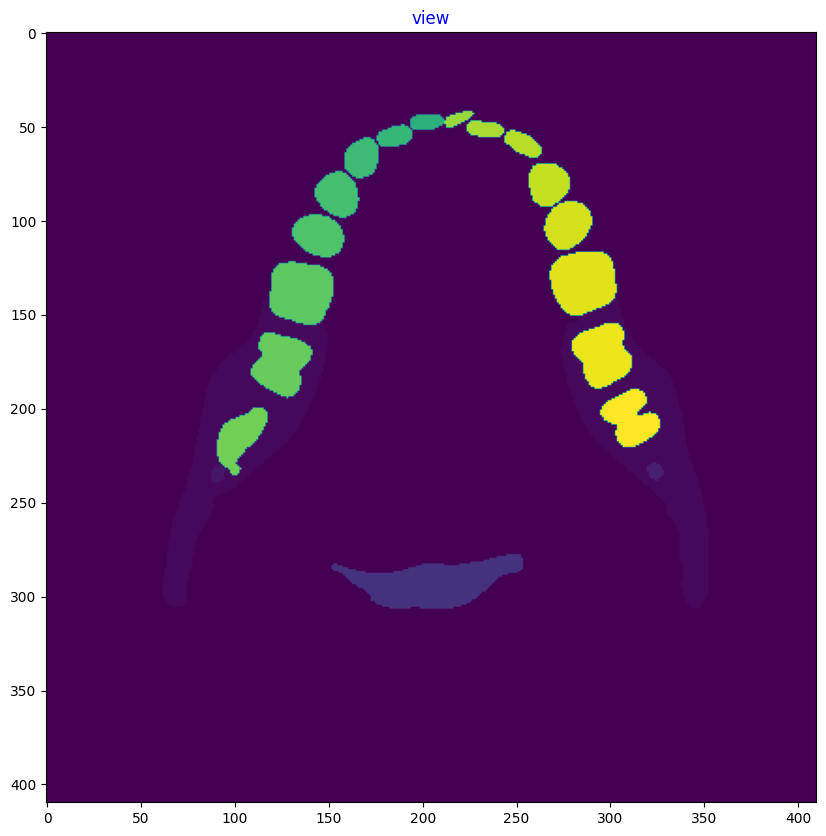

In [15]:
view(mha_label_array[130])

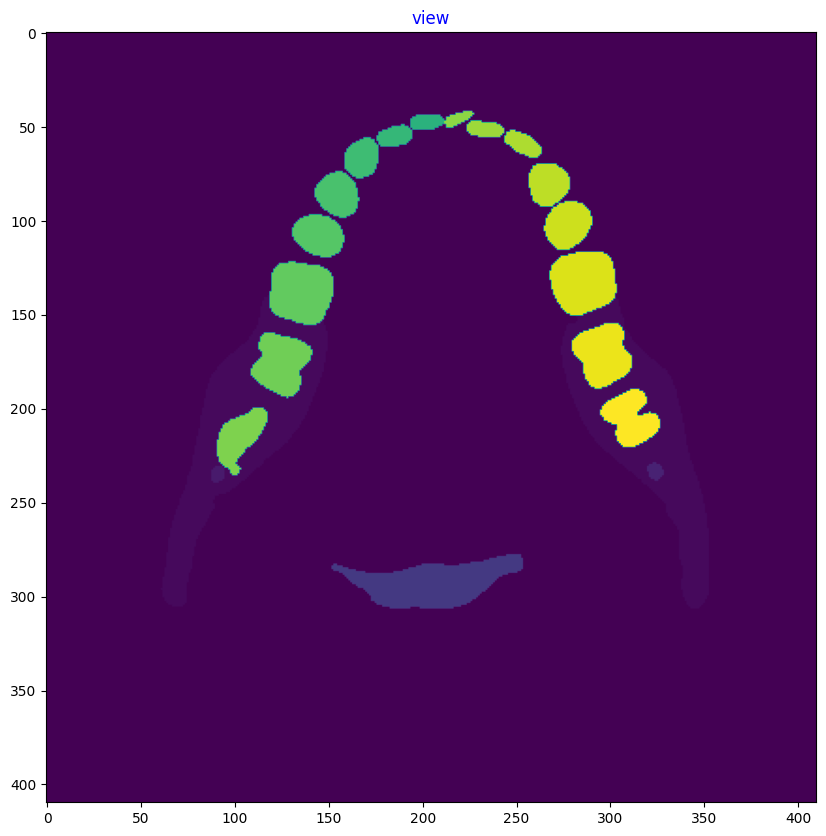

In [16]:
view(mha_relabel_array[130])

In [ ]:
sitk.GetImageFromArray()

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)